In [147]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans  


In [148]:
# Reading Dataset and preprocessing it
DataSet=pd.read_csv("CC GENERAL.csv")
DataSet.drop(['CUST_ID'], axis=1,inplace=True)
DataSet.dropna (axis=0,how="any",inplace=True)
# We Will deal with balance frequency and purchases frequency features
DataSet= pd.DataFrame(DataSet.iloc[:,[1,6]].values)
DataSet

,0,1
0,0.818182,0.166667
1,0.909091,0.000000
2,1.000000,1.000000
3,1.000000,0.083333
4,1.000000,0.666667
...,...,...
8631,0.500000,0.166667
8632,1.000000,1.000000
8633,0.833333,0.833333
8634,0.833333,0.000000


In [149]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(DataSet)
agglomerative=pd.DataFrame(y_hc)
agglomerative.value_counts()


0    3271
3    2935
4    1238
2     802
1     390
dtype: int64

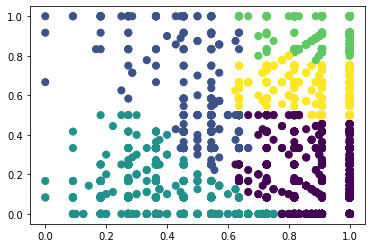

In [150]:
# Plot the hyrorical clusters
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (DataSet [0] , DataSet [1] , c= agglomerative[0], s=50)


In [151]:
# Change the recursion limit
import sys
sys.setrecursionlimit(9000)

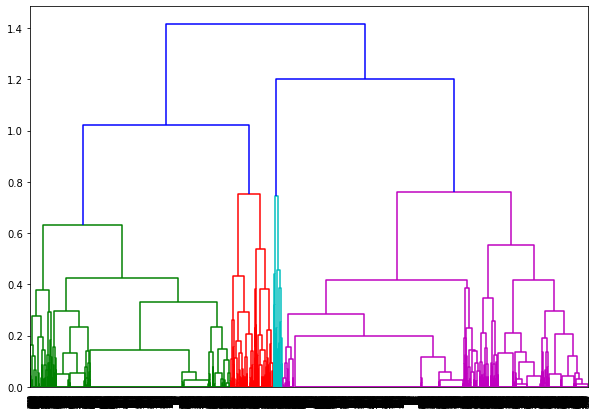

In [152]:
# Plot the dentograme
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(DataSet, method = 'complete'))

In [168]:
# Clustering using Kmeans and Visualizing the results 
def KMEANS_and_VISUALIZATION(n_clusters):
  # Kmeans Clustering 
  kmeans=KMeans(n_clusters, random_state=0) 
  kmeans.fit(DataSet)
  # Kmeans Labels
  labels=pd.DataFrame(kmeans.labels_)
  # Kmeans Centroids
  kmeans.predict(DataSet)
  print(kmeans.cluster_centers_)  
  # Add labels to Dataset 
  DataSet["labels"]=labels
  # Visualization
  color_codes=["#db7093","#995500","#10425c","#01a4dd","#00ff33","#b00be5","#db9370","#e735d5","#01ff8d","#202532"] 
  for i in range(0,n_clusters):
    plt.scatter(DataSet[0][DataSet["labels"] == i],DataSet[1][DataSet["labels"] == i],s=80,c=color_codes[i])
    
    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[ 9.87197922e-01  8.80194648e-01 -3.76365605e-14]
 [ 8.69241093e-01  1.74003796e-01  2.11891026e+00]
 [ 7.28808595e-01  2.07133345e-01  1.00000000e+00]]


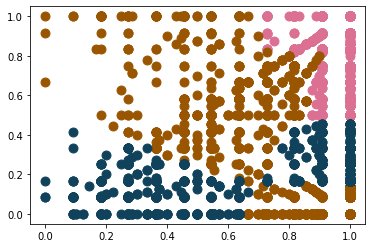

In [169]:
 # kmeans with 3 clusters 
 KMEANS_and_VISUALIZATION(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[9.87197922e-01 8.80194648e-01 2.96429548e-14]
 [9.66543979e-01 2.33310844e-02 1.00000000e+00]
 [3.67252651e-01 9.41589735e-02 2.00000000e+00]
 [9.80712326e-01 2.85844997e-01 2.00000000e+00]
 [6.06846108e-01 5.80320255e-01 1.00000000e+00]]


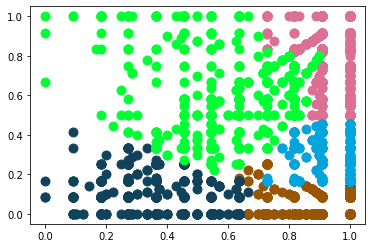

In [170]:
 # kmeans with 5 clusters 
 KMEANS_and_VISUALIZATION(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[3.67252651e-01 9.41589735e-02 2.00000000e+00]
 [9.86566429e-01 9.63711377e-01 1.73194792e-14]
 [7.50098839e-01 6.42022031e-01 4.00000000e+00]
 [9.66543979e-01 2.33310844e-02 1.00000000e+00]
 [9.80712326e-01 2.85844997e-01 3.00000000e+00]
 [9.89151332e-01 6.21850745e-01 9.99200722e-15]
 [4.14607872e-01 9.26207145e-01 4.00000000e+00]
 [5.31775679e-01 4.13877759e-01 4.00000000e+00]]


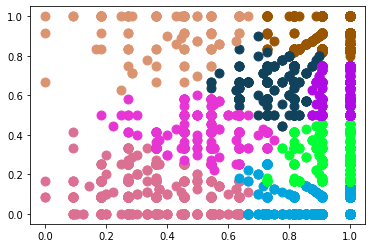

In [171]:
 # kmeans with 8 clusters 
 KMEANS_and_VISUALIZATION(8)

In [172]:
#Calculate the best k valaue using Elbow Methodolgy
Sum_of_squared_distances=[]
k=range (1,15)
for n in k :
  km = KMeans(n_clusters= n)
  km.fit(DataSet)
  Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Text(0.5, 1.0, 'Elbow Methodology')

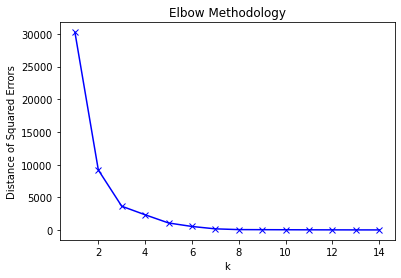

In [173]:
plt.plot(k,Sum_of_squared_distances,'bx-')
plt.xlabel("k")
plt.ylabel("Distance of Squared Errors")
plt.title("Elbow Methodology")

The Best K values is 4 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[9.70796226e-01 1.02117548e-01 3.30012300e+00]
 [9.61039499e-01 9.28984668e-01 1.10795107e+00]
 [8.22986702e-01 5.92441960e-01 5.60320781e+00]
 [3.67252651e-01 9.41589735e-02 4.44089210e-16]]


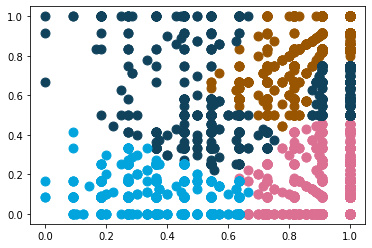

In [174]:
 # kmeans with 4 clusters 
 KMEANS_and_VISUALIZATION(4)